<a href="https://colab.research.google.com/github/Mardugo/ClaseMachineLearning/blob/main/time_series_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# adaptado de:
# https://www.mdeditor.tw/pl/2dX7/zh-tw
# https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20ANN%20%26%20LSTM%20VIX.ipynb

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras
print(keras.__version__)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM

2.6.0


In [ ]:
df = pd.read_csv("vix_2011_2019.csv")

In [ ]:
print(df.head(15))

          Date       Open       High        Low      Close  Adj Close  Volume
0   2011-02-11  16.530001  16.530001  15.550000  15.690000  15.690000       0
1   2011-02-14  16.070000  16.260000  15.220000  15.950000  15.950000       0
2   2011-02-15  16.299999  16.750000  16.270000  16.370001  16.370001       0
3   2011-02-16  16.309999  16.740000  15.840000  16.719999  16.719999       0
4   2011-02-17  17.010000  17.299999  15.880000  16.590000  16.590000       0
5   2011-02-18  16.590000  16.910000  15.540000  16.430000  16.430000       0
6   2011-02-22  19.459999  21.450001  18.379999  20.799999  20.799999       0
7   2011-02-23  20.840000  23.219999  20.299999  22.129999  22.129999       0
8   2011-02-24  22.280001  22.709999  20.809999  21.320000  21.320000       0
9   2011-02-25  20.410000  20.440001  18.879999  19.219999  19.219999       0
10  2011-02-28  19.120001  19.270000  18.139999  18.350000  18.350000       0
11  2011-03-01  17.629999  21.010000  17.629999  21.010000  21.0

In [ ]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
ind_df = df.set_index(['Date'], drop=True)
ind_df.head()

,Adj Close
Date,
2011-02-11,15.690000
2011-02-14,15.950000
2011-02-15,16.370001
2011-02-16,16.719999
2011-02-17,16.590000


(2011, 1)


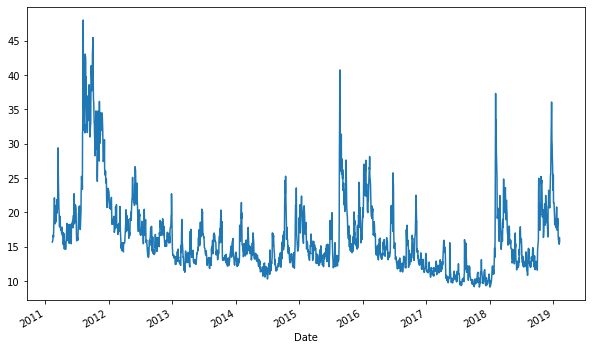

In [ ]:
ind_df = ind_df.sort_index()
plt.figure(figsize=(10, 6))
ind_df['Adj Close'].plot();
print(ind_df.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1733,)
(279,)
<class 'pandas.core.series.Series'>
(1733,)


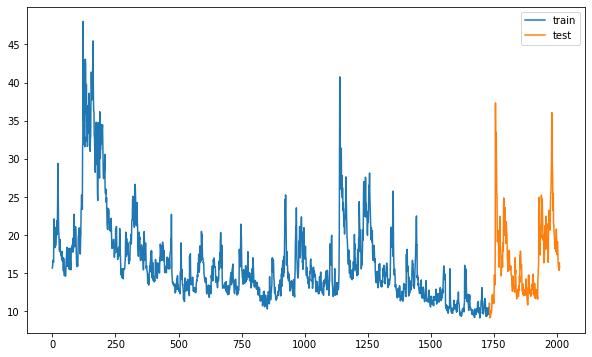

In [ ]:
df2 =  df['Adj Close']
print(type(df))
print(type(df2))
partition=1732#TO DO find for the time label e.g.'2018-01-02'
train = df2.loc[:partition]
test = df2.loc[partition:]
print(train.shape)
print(test.shape)


plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);
print(type(train))
print(train.values.shape)


In [ ]:
scaler = MinMaxScaler()#feature_range=(-1, 1)
print(train.values.reshape(-1, 1))
scaler.fit(train.values.reshape(-1, 1))
train_sc = scaler.transform(train.values.reshape(-1, 1))
test_sc = scaler.transform(test.values.reshape(-1, 1))
print(type(train_sc))
print(train_sc.size)
print(train.shape)
print(train_sc.shape)

[[15.69    ]
 [15.95    ]
 [16.370001]
 ...
 [10.47    ]
 [10.18    ]
 [11.04    ]]
<class 'numpy.ndarray'>
1733
(1733,)
(1733, 1)


In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [ ]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

# Simple ANN for Time Series Forecasting
We create a Sequential model.
add layers via the .add() method.

Pass an input_dim argument to the first layer.
The activation function is the Rectified Linear Unit- Relu.

Configure the learning process, which is done via the compile method.

A loss function is mean_squared_error , and An optimizer is adam.

Stop training when a monitored loss has stopped improving.

patience=2, indicate number of epochs with no improvement after which training will be stopped.

The ANN is trained for 100 epochs and a batch size of 1 is used.

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0023
Epoch 2/100
1732/1732 [==============================] - 2s 968us/step - loss: 0.0016
Epoch 3/100
1732/1732 [==============================] - 2s 990us/step - loss: 0.0016
Epoch 4/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0015
Epoch 5/100
1732/1732 [==============================] - 2s 999us/step - loss: 0.0015
Epoch 6/100
1732/1732 [==============================] - 2s 933us/step - loss: 0.0015
Epoch 7/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0015
Epoch 8/100
1732/1732 [==============================] - 2s 978us/step - loss: 0.0015
Epoch 9/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0015
Epoch 10/100
1732/1732 [==============================] - 2s 979us/step - loss: 0.0015
Epoch 11/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0015
Epoch 12/100
1732/1732 [==============================] - 2s 9

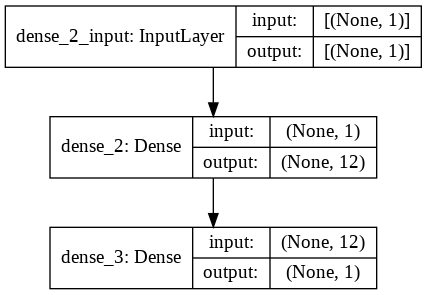

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(nn_model, to_file="modelo.png",show_shapes=True)

In [ ]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.867
The R2 score on the Test set is:	0.768


In [ ]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
print(train_sc_df)
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
print(X_train)
print(y_train)
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train_lmse = X_train.reshape(X_train.shape[0],1, X_train.shape[1])
X_test_lmse = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

             Y       X_1
0     0.168554       NaN
1     0.175244  0.168554
2     0.186053  0.175244
3     0.195059  0.186053
4     0.191714  0.195059
...        ...       ...
1728  0.019557  0.012352
1729  0.028564  0.019557
1730  0.034225  0.028564
1731  0.026763  0.034225
1732  0.048893  0.026763

[1733 rows x 2 columns]
           X_1
1     0.168554
2     0.175244
3     0.186053
4     0.195059
5     0.191714
...        ...
1728  0.012352
1729  0.019557
1730  0.028564
1731  0.034225
1732  0.026763

[1732 rows x 1 columns]
             Y
1     0.175244
2     0.186053
3     0.195059
4     0.191714
5     0.187597
...        ...
1728  0.019557
1729  0.028564
1730  0.034225
1731  0.026763
1732  0.048893

[1732 rows x 1 columns]
Train shape:  (1732, 1, 1)
Test shape:  (278, 1, 1)


In [ ]:
print(X_train_lmse.shape)
print(X_train.shape)
print(X_train_lmse.shape[1])

(1732, 1, 1)
(1732, 1)
1


In [ ]:
lstm_model = Sequential()
#https://keras.io/api/layers/recurrent_layers/lstm/
lstm_model.add(LSTM(20, input_shape=(1, X_train_lmse.shape[2]), activation='tanh', kernel_initializer='lecun_uniform', return_sequences=False,go_backwards=True))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=20, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/20
1732/1732 [==============================] - 5s 2ms/step - loss: 0.0103
Epoch 2/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0019
Epoch 3/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 4/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 5/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 6/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 7/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 8/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 9/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 10/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 11/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 12/20
1732/1732 [==============================] - 3s 2ms/step - loss: 0.0015
E

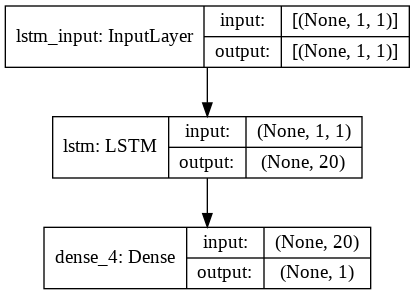

In [ ]:
from  tensorflow.keras.utils import plot_model
plot_model(lstm_model, to_file="modelo2.png",show_shapes=True)

In [ ]:
print(y_train.shape)
#.reshape

(1732, 1)


In [ ]:
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.866
The R2 score on the Test set is:	0.774


In [ ]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

278/278 [==============================] - 1s 1ms/step - loss: 0.0036
NN: 0.003720
LSTM: 0.003623


In [ ]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

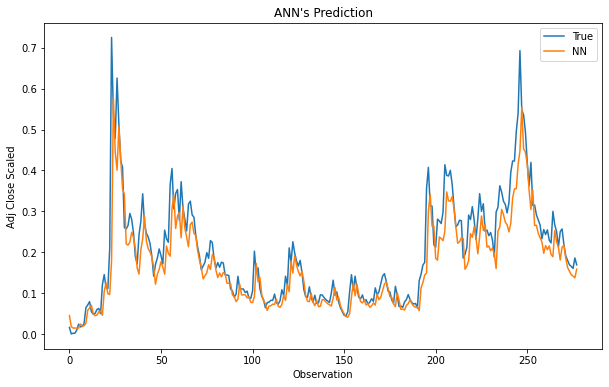

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

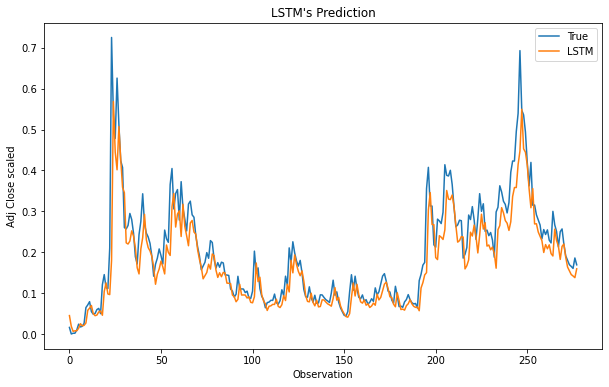

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();